In [2]:
import pandas as pd
import os
import shutil

metrics = os.listdir()
for dir in ["json_results","txt_results","figures","excel"]:
    if not os.path.exists(dir):
        os.mkdir(dir)
raw = ""
dict_file = []
for f in metrics:
    if f.endswith(".txt"):
        with open(f, 'r') as file:
            filedata = file.read()
            filedata = filedata.replace("\'","\"")
            with open(os.path.join("json_results",f.split(".txt")[0]+".json"),'w') as fp:
                dict_file.append(fp.name)
                fp.write(filedata)
        shutil.move(f,os.path.join("txt_results",f))

9
7


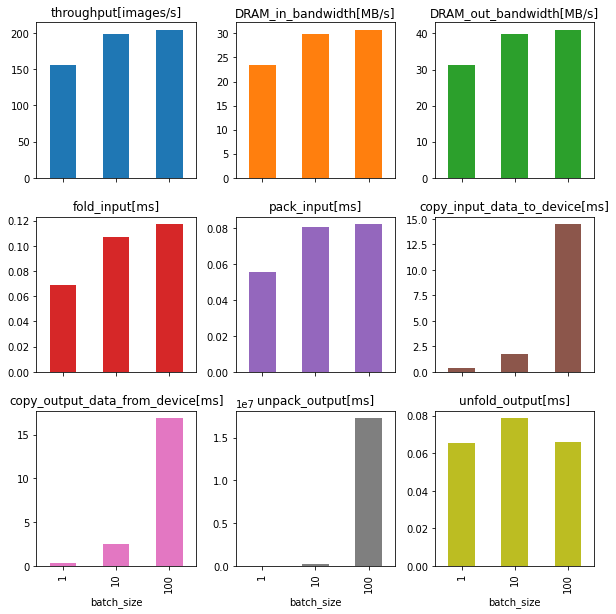

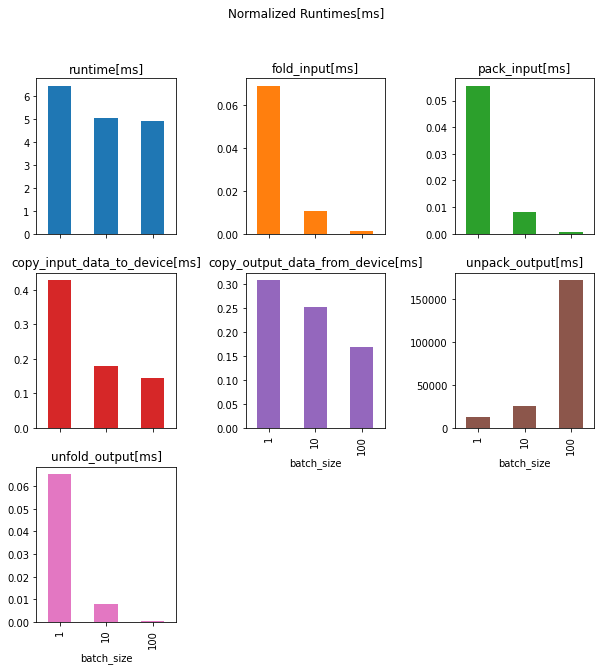

In [19]:
import matplotlib.pyplot as plt
import json
dict_file = os.listdir("json_results")
df_list = []
for d in dict_file:
    data = json.load(open(os.path.join("json_results",d)))
    df_list.append(data)

df = pd.DataFrame(df_list)
df.index = df["batch_size"]
df_norm = pd.DataFrame()
for c,v in df.iteritems():
    if "[ms]" in c:
        df_norm[c] = df[c]/df.index
        # print(df[c+"_normalized"])
df= df.drop(["runtime[ms]","batch_size", "fclk[mhz]"], axis=1)
df.to_excel(os.path.join("excel","runtime_metrics_partition_0.xlsx"), index=True)
print(len(df.columns))
df.plot(kind = 'bar',subplots=True,layout=(3,3),
        figsize=(10,10),sharex=True,legend=False)
plt.subplots_adjust(wspace=0.25,hspace=0.25)
plt.savefig(os.path.join("figures","run-metrics-partion-0.png"), dpi=300,facecolor = 'w')


print(len(df_norm.columns))
df_norm.plot(kind = 'bar',subplots=True,layout=(3,3),
        figsize=(10,10),sharex=True,legend=False)
plt.suptitle("Normalized Runtimes[ms]")
plt.subplots_adjust(wspace=0.5,hspace=0.25)
plt.savefig(os.path.join("figures","run-metrics-partion-0-normalized.png"), dpi=300,facecolor = 'w')